<a href="https://colab.research.google.com/github/byrcewang/DL_SS2H/blob/main/Mini_CNN%2BMNIST%2Bvalidate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9912422/9912422 [00:00<00:00, 194222754.36it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 4435580.15it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 20642048.83it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13257152.94it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10] - Train Loss: 0.2379, Train Accuracy: 93.03%, Validation Loss: 0.0710, Validation Accuracy: 97.88%
Epoch [2/10] - Train Loss: 0.0621, Train Accuracy: 98.08%, Validation Loss: 0.0476, Validation Accuracy: 98.46%
Epoch [3/10] - Train Loss: 0.0448, Train Accuracy: 98.57%, Validation Loss: 0.0391, Validation Accuracy: 98.87%
Epoch [4/10] - Train Loss: 0.0331, Train Accuracy: 98.94%, Validation Loss: 0.0365, Validation Accuracy: 98.85%
Epoch [5/10] - Train Loss: 0.0260, Train Accuracy: 99.16%, Validation Loss: 0.0384, Validation Accuracy: 98.78%
Epoch [6/10] - Train Loss: 0.0196, Train Accuracy: 99.38%, Validation Loss: 0.0350, Validation Accuracy: 99.02%
Epoch [7/10] - Train Loss: 0.0154, Train Accuracy: 99.52%, Validation Loss: 0.0340, Validation Accuracy: 99.01%
Epoch [8/10] - Train Loss: 0.0149, Train Accuracy: 99.52%, Validation Loss: 0.0364, Validation Accuracy: 99.03%
Epoch [9/10] - Train Loss: 0.

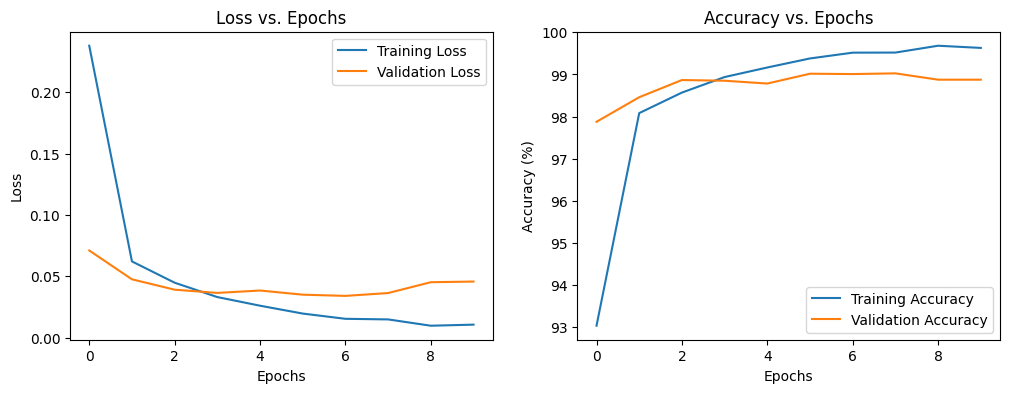

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split the training set into training and validation
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(trainset, [train_size, val_size])

# Create data loaders
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the mini CNN model
class MiniCNN(nn.Module):
    def __init__(self):
        super(MiniCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model = MiniCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and validation loop
num_epochs = 10
train_losses, val_losses, train_accuracy, val_accuracy = [], [], [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for data in trainloader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy.append(100 * correct_train / total_train)
    train_losses.append(running_loss / len(trainloader))

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy.append(100 * correct_val / total_val)
    val_losses.append(val_loss / len(valloader))

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.2f}%")

# Test the model
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total

print(f"Test Accuracy: {test_accuracy:.2f}%")

# Visualize loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epochs')

plt.show()

In [ ]:
## With Chinese comments
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 引入PyTorch和相关库

# 定义数据转换
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# 创建一个数据转换管道，将图像数据转换为张量并进行标准化

# 下载并加载MNIST数据集
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# 从torchvision中下载MNIST训练数据集，将数据保存到'./data'文件夹中，并应用上述定义的数据转换
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
# 从torchvision中下载MNIST测试数据集，将数据保存到'./data'文件夹中，并应用上述定义的数据转换

# 将训练集分为训练和验证集
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(trainset, [train_size, val_size])
# 将训练集按80%和20%的比例分为训练和验证集，用于模型训练和性能验证

# 创建数据加载器
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
# 创建训练数据加载器，每次加载64个样本，shuffle=True表示打乱数据以增加随机性
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
# 创建验证数据加载器，与训练加载器类似，但不打乱数据
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
# 创建测试数据加载器，用于对模型进行测试

# 以上是对PyTorch中处理数据的一系列操作，包括数据转换、数据集的下载与划分，以及数据加载器的创建。
# 导入所需的库
import torch
import torch.nn as nn
import torch.optim as optim

# 定义一个小型卷积神经网络（CNN）模型
class MiniCNN(nn.Module):
    def __init__(self):
        super(MiniCNN, self).__init__()
        # 第一层卷积层，输入通道为1（灰度图像），输出通道为16，卷积核大小为3x3，padding=1表示保持输入输出大小相同
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        # 第二层卷积层，输入通道为16，输出通道为32，卷积核大小为3x3，padding=1
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # 第一个全连接层，输入大小为32*7*7，输出大小为128
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        # 第二个全连接层，输入大小为128，输出大小为10（用于分类任务）

    def forward(self, x):
        # 使用ReLU激活函数对第一层卷积结果进行非线性处理
        x = torch.relu(self.conv1(x))
        # 使用最大池化层，2x2的池化核，缩小特征图尺寸
        x = torch.max_pool2d(x, 2)
        # 使用ReLU激活函数对第二层卷积结果进行非线性处理
        x = torch.relu(self.conv2(x))
        # 再次使用最大池化层，进一步缩小特征图尺寸
        x = torch.max_pool2d(x, 2)
        # 将特征图展平为一维向量，为全连接层准备数据
        x = x.view(x.size(0), -1)
        # 使用ReLU激活函数对第一个全连接层的输出进行非线性处理
        x = torch.relu(self.fc1(x))
        # 输出层，不使用激活函数，用于分类问题的得分
        x = self.fc2(x)
        return x

# 初始化模型
model = MiniCNN()

# 定义损失函数（交叉熵损失）和优化器（Adam优化器）
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练和验证循环的参数
num_epochs = 10
train_losses, val_losses, train_accuracy, val_accuracy = [], [], [], []


# 遍历训练周期
for epoch in range(num_epochs):
    # 设置模型为训练模式，这将启用梯度计算和参数更新
    model.train()
    running_loss = 0.0  # 用于跟踪每个训练周期的总损失
    correct_train = 0  # 用于跟踪每个训练周期中分类正确的样本数
    total_train = 0  # 用于跟踪每个训练周期中的总样本数

    # 遍历训练数据集中的批次
    for data in trainloader:
        inputs, labels = data  # 从数据批次中获取输入数据和标签
        optimizer.zero_grad()  # 清零梯度，以准备计算新的梯度
        outputs = model(inputs)  # 通过模型前向传播计算预测
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播，计算梯度
        optimizer.step()  # 根据梯度更新模型参数
        running_loss += loss.item()  # 累积损失

        _, predicted = torch.max(outputs.data, 1)  # 找到每个样本的预测类别
        total_train += labels.size(0)  # 累积总样本数
        correct_train += (predicted == labels).sum().item()  # 累积分类正确的样本数

    # 计算并记录训练准确率和损失
    train_accuracy.append(100 * correct_train / total_train)
    train_losses.append(running_loss / len(trainloader))

    # 进入验证循环
    model.eval()  # 设置模型为评估模式，不进行梯度计算和参数更新
    val_loss = 0.0  # 用于跟踪每个验证周期的总损失
    correct_val = 0  # 用于跟踪每个验证周期中分类正确的样本数
    total_val = 0  # 用于跟踪每个验证周期中的总样本数

    with torch.no_grad():  # 在验证循环中不进行梯度计算
        # 遍历验证数据集中的批次
        for data in valloader:
            inputs, labels = data
            outputs = model(inputs)  # 通过模型前向传播计算预测
            loss = criterion(outputs, labels)  # 计算损失
            val_loss += loss.item()  # 累积损失

            _, predicted = torch.max(outputs.data, 1)  # 找到每个样本的预测类别
            total_val += labels.size(0)  # 累积总样本数
            correct_val += (predicted == labels).sum().item()  # 累积分类正确的样本数

    # 计算并记录验证准确率和损失
    val_accuracy.append(100 * correct_val / total_val)
    val_losses.append(val_loss / len(valloader))

    # 打印训练和验证结果
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy[-1]:.2f}%")


# Test the model
# 测试模型

# 设置模型为评估模式，这会禁用梯度计算，通常用于模型测试
model.eval()

# 初始化变量来追踪正确分类的样本数量和总样本数量
test_correct = 0
test_total = 0

# 使用torch.no_grad()上下文管理器，禁用梯度计算以提高效率
with torch.no_grad():
    # 迭代测试数据加载器中的数据
    for data in testloader:
        # 从data中获取输入数据和相应的标签
        inputs, labels = data

        # 使用模型进行前向传播，获取输出
        outputs = model(inputs)

        # 使用torch.max函数找到每个样本中具有最高概率的类别
        _, predicted = torch.max(outputs.data, 1)

        # 更新总样本数量
        test_total += labels.size(0)

        # 检查预测是否与实际标签匹配，并将正确分类的样本数量增加
        test_correct += (predicted == labels).sum().item()

# 计算测试准确率，以百分比表示
test_accuracy = 100 * test_correct / test_total

# 打印测试准确率
print(f"Test Accuracy: {test_accuracy:.2f}%")